In [97]:
import pandas as  pd
df=pd.read_csv("Tweets.csv")

In [98]:
df.head

<bound method NDFrame.head of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason

In [99]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [100]:

dfn=df[['text','airline_sentiment']]
print(dfn.shape)

(14640, 2)


In [101]:
#remove stop words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JeeKay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
#stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)


In [103]:
#removing url and special characters
import re

def remove_urls_special_characters(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation except for apostrophes
    text = re.sub(r'[^a-zA-Z0-9\']+', ' ', text)
    return text


In [104]:
dfn.head

<bound method NDFrame.head of                                                     text airline_sentiment
0                    @VirginAmerica What @dhepburn said.           neutral
1      @VirginAmerica plus you've added commercials t...          positive
2      @VirginAmerica I didn't today... Must mean I n...           neutral
3      @VirginAmerica it's really aggressive to blast...          negative
4      @VirginAmerica and it's a really big bad thing...          negative
...                                                  ...               ...
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14637  @AmericanAir Please bring American Airlines to...           neutral
14638  @AmericanAir you have my money, you change my ...          negative
14639  @AmericanAir we have 8 ppl so we need 2 know h...           neutral

[14640 rows x 2 columns]>

In [105]:
dfn=dfn[dfn['airline_sentiment']!='neutral']
print(dfn.shape)

(11541, 2)


In [106]:
dfn.head

<bound method NDFrame.head of                                                     text airline_sentiment
1      @VirginAmerica plus you've added commercials t...          positive
3      @VirginAmerica it's really aggressive to blast...          negative
4      @VirginAmerica and it's a really big bad thing...          negative
5      @VirginAmerica seriously would pay $30 a fligh...          negative
6      @VirginAmerica yes, nearly every time I fly VX...          positive
...                                                  ...               ...
14633  @AmericanAir my flight was Cancelled Flightled...          negative
14634         @AmericanAir right on cue with the delays👌          negative
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14638  @AmericanAir you have my money, you change my ...          negative

[11541 rows x 2 columns]>

In [107]:
dfn["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
positive    2363
Name: count, dtype: int64

In [108]:
labels=dfn.airline_sentiment.factorize()

In [109]:
labels

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [110]:
tweet=dfn.text.values

In [111]:

# Filter positive tweets
positive_tweets = df[df['airline_sentiment'] == 'positive']

# Filter negative tweets
negative_tweets = df[df['airline_sentiment'] == 'negative']

# Display positive tweets
print("Positive Tweets:")
print(positive_tweets.head())

# Display negative tweets
print("\nNegative Tweets:")
print(negative_tweets.head())


Positive Tweets:
              tweet_id airline_sentiment  airline_sentiment_confidence  \
1   570301130888122368          positive                        0.3486   
6   570300616901320704          positive                        0.6745   
8   570299953286942721          positive                        0.6559   
9   570295459631263746          positive                        1.0000   
11  570289724453216256          positive                        1.0000   

   negativereason  negativereason_confidence         airline  \
1             NaN                        0.0  Virgin America   
6             NaN                        0.0  Virgin America   
8             NaN                        NaN  Virgin America   
9             NaN                        NaN  Virgin America   
11            NaN                        NaN  Virgin America   

   airline_sentiment_gold          name negativereason_gold  retweet_count  \
1                     NaN      jnardino                 NaN              0 

In [112]:
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [113]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)


Class Weights: {0: 2.4091858037578286, 1: 0.6309458720612356}


In [114]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [115]:
pip install numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/13.0 MB 7.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.4/13.0 MB 6.1 MB/s eta 0:00:02
   --------- ------------------------------ 3.1/13.0 MB 5.6 MB/s eta 0:00:02
   ------------ --------------------------- 4.2/13.0 MB 5.4 MB/s eta 0:00:02
   ---------------- ----------------------- 5.2/13.0 MB 5.2 MB/s eta 0:00:02
   ------------------- -------------------- 6.3/13.0 MB 5.1 MB/s eta 0:00:02
   --------------------- ------------------ 7.1/13.0 MB 5.0 MB/s eta 0:00:02
   ------------------------ --------------- 8.1/13.0 MB 5.0 MB/s eta 0:00:01
   ---------------------------- ----------- 9.2/13.0 MB 4.9 MB/s eta 0:00:01
   ------------------------------ --------- 10.0/13.0 MB 4.9 MB/s eta 0:00:01
   --------------------------------- ------ 11.0/13.0 MB 4.9 MB/s eta 0:00:01
   

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.3.1 which is incompatible.
matplotlib 3.8.1 requires numpy<2,>=1.21, but you have numpy 2.3.1 which is incompatible.
scikit-learn 1.3.2 requires numpy<2.0,>=1.17.3, but you have numpy 2.3.1 which is incompatible.
scipy 1.11.3 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.3.1 which is incompatible.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.3.1 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [117]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [118]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [119]:
pip install transformers


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [120]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="siebert/sentiment-roberta-large-english")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [121]:
print(pipe("hello there!!"))

[{'label': 'POSITIVE', 'score': 0.9979816675186157}]


In [122]:
print(pipe("Very bad!!"))

[{'label': 'NEGATIVE', 'score': 0.9994588494300842}]


In [123]:
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, Dense, Dropout, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint

In [124]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequence, labels[0], test_size=0.2, random_state=42)

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense


In [126]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#Build CNN Model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=16))
cnn_model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(16, activation='relu'))
cnn_model.add(Dropout(0.5))  # Increase dropout rate
cnn_model.add(Dense(1, activation='sigmoid'))

In [127]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [128]:
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [129]:
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=2), model_checkpoint])

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7448 - loss: 0.6675 - val_accuracy: 0.8064 - val_loss: 0.5771
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7896 - loss: 0.5613 - val_accuracy: 0.8064 - val_loss: 0.4916
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7998 - loss: 0.5049 - val_accuracy: 0.8064 - val_loss: 0.4758
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7956 - loss: 0.4953 - val_accuracy: 0.8064 - val_loss: 0.4602
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7892 - loss: 0.4871 - val_accuracy: 0.8064 - val_loss: 0.4394
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7956 - loss: 0.4557 - val_accuracy: 0.8064 - val_loss: 0.4129
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8099 - loss: 0.4272 - val_accuracy: 0.8224 - val_loss: 0.3867
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8165 - loss: 0.3999 - val_accuracy: 0.

In [130]:
cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=0)
print("CNN Test Accuracy:", cnn_scores[1])

CNN Test Accuracy: 0.8700736165046692


In [131]:
# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=64))
lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
lstm_model.add(GlobalMaxPooling1D())
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

In [132]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [133]:
lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 55s 339ms/step - accuracy: 0.8192 - loss: 0.4681 - val_accuracy: 0.9199 - val_loss: 0.2202
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 258ms/step - accuracy: 0.9395 - loss: 0.1518 - val_accuracy: 0.9233 - val_loss: 0.2090
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 46s 319ms/step - accuracy: 0.9643 - loss: 0.0987 - val_accuracy: 0.9246 - val_loss: 0.2332
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 252ms/step - accuracy: 0.9783 - loss: 0.0684 - val_accuracy: 0.9203 - val_loss: 0.2839
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 33s 228ms/step - accuracy: 0.9850 - loss: 0.0436 - val_accuracy: 0.9212 - val_loss: 0.3142
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 33s 226ms/step - accuracy: 0.9899 - loss: 0.0354 - val_accuracy: 0.9164 - val_loss: 0.3505
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 33s 227ms/step - accuracy: 0.9903 - loss: 0.0302 - val_accuracy: 0.9173 - val_loss: 0.3728
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 39s 268ms/step - accuracy: 0.9953 - loss: 0

In [134]:
lstm_scores = lstm_model.evaluate(X_test, y_test, verbose=0)
print("LSTM Test Accuracy:", lstm_scores[1])

LSTM Test Accuracy: 0.9142485857009888


In [135]:
from tensorflow.keras.layers import Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [136]:
# Build BiLSTM Model
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=5000, output_dim=32))
bilstm_model.add(Bidirectional(LSTM(32, return_sequences=True)))
bilstm_model.add(GlobalMaxPooling1D())
bilstm_model.add(Dense(32, activation='relu'))
bilstm_model.add(Dense(1, activation='sigmoid'))

In [137]:
bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [138]:
bilstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 52s 157ms/step - accuracy: 0.8118 - loss: 0.4699 - val_accuracy: 0.9251 - val_loss: 0.2138
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.9393 - loss: 0.1641 - val_accuracy: 0.9233 - val_loss: 0.2081
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.9681 - loss: 0.0919 - val_accuracy: 0.9194 - val_loss: 0.2140
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 43s 147ms/step - accuracy: 0.9767 - loss: 0.0705 - val_accuracy: 0.9199 - val_loss: 0.2515
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 48s 165ms/step - accuracy: 0.9886 - loss: 0.0417 - val_accuracy: 0.9194 - val_loss: 0.2945
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 46s 158ms/step - accuracy: 0.9849 - loss: 0.0442 - val_accuracy: 0.9151 - val_loss: 0.3306
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 51s 175ms/step - accuracy: 0.9930 - loss: 0.0228 - val_accuracy: 0.9060 - val_loss: 0.3378
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 48s 165ms/step - accuracy: 0.9929 - loss: 0

In [139]:
bilstm_scores = bilstm_model.evaluate(X_test, y_test, verbose=0)
print("BiLSTM Test Accuracy:", bilstm_scores[1])

BiLSTM Test Accuracy: 0.9125162363052368


In [140]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer

In [141]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        et = K.squeeze(K.tanh(K.dot(x, self.W) + self.b), axis=-1)
        at = K.softmax(et)
        at = K.expand_dims(at, axis=-1)
        output = x * at
        return K.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

In [142]:
bilstm_attention_model = Sequential()
bilstm_attention_model.add(Embedding(input_dim=5000, output_dim=64))
bilstm_attention_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_attention_model.add(AttentionLayer())
bilstm_attention_model.add(Dense(64, activation='relu'))
bilstm_attention_model.add(Dense(1, activation='sigmoid'))

In [143]:
bilstm_attention_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [144]:
bilstm_attention_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))



Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 44s 268ms/step - accuracy: 0.7699 - loss: 0.5334 - val_accuracy: 0.8064 - val_loss: 0.5022
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 38s 265ms/step - accuracy: 0.7867 - loss: 0.4962 - val_accuracy: 0.8064 - val_loss: 0.4327
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 39s 268ms/step - accuracy: 0.8075 - loss: 0.3759 - val_accuracy: 0.8930 - val_loss: 0.2734
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 36s 251ms/step - accuracy: 0.8702 - loss: 0.2931 - val_accuracy: 0.9164 - val_loss: 0.2255
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 41s 280ms/step - accuracy: 0.9458 - loss: 0.1381 - val_accuracy: 0.9251 - val_loss: 0.2309
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 35s 243ms/step - accuracy: 0.9650 - loss: 0.1010 - val_accuracy: 0.9138 - val_loss: 0.2499
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 256ms/step - accuracy: 0.9727 - loss: 0.0779 - val_accuracy: 0.9147 - val_loss: 0.2553
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 36s 248ms/step - accuracy: 0.9833 - loss: 0

In [145]:
# Evaluate BiLSTM Model with Attention
bilstm_attention_scores = bilstm_attention_model.evaluate(X_test, y_test, verbose=0)
print("BiLSTM with Attention Test Accuracy:", bilstm_attention_scores[1])

BiLSTM with Attention Test Accuracy: 0.9159809350967407


In [146]:
# Assuming you have trained your CNN model like this:
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# And your BiLSTM model like this:
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8579 - loss: 0.3307 - val_accuracy: 0.8718 - val_loss: 0.3250
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8598 - loss: 0.3200 - val_accuracy: 0.8766 - val_loss: 0.3177
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8610 - loss: 0.3190 - val_accuracy: 0.8822 - val_loss: 0.3109
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8683 - loss: 0.3059 - val_accuracy: 0.8848 - val_loss: 0.3042
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8642 - loss: 0.2987 - val_accuracy: 0.8874 - val_loss: 0.2983
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8789 - loss: 0.2795 - val_accuracy: 0.8904 - val_loss: 0.2926
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8760 - loss: 0.2855 - val_accuracy: 0.8943 - val_loss: 0.2879
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8798 - loss: 0.2733 - val_accuracy: 0.

In [147]:
# Define cnn_history and bilstm_history variables
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
bilstm_history = bilstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))




Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8906 - loss: 0.2483 - val_accuracy: 0.9039 - val_loss: 0.2718
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8960 - loss: 0.2413 - val_accuracy: 0.9047 - val_loss: 0.2691
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8958 - loss: 0.2367 - val_accuracy: 0.9043 - val_loss: 0.2665
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8999 - loss: 0.2234 - val_accuracy: 0.9052 - val_loss: 0.2633
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9010 - loss: 0.2272 - val_accuracy: 0.9060 - val_loss: 0.2622
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9036 - loss: 0.2116 - val_accuracy: 0.9065 - val_loss: 0.2598
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9102 - loss: 0.2154 - val_accuracy: 0.9073 - val_loss: 0.2586
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9149 - loss: 0.2068 - val_accuracy: 0

In [148]:
# Train the BiLSTM with Attention model
bilstm_attention_history = bilstm_attention_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Store the training history
bilstm_attention_train_accuracy = bilstm_attention_history.history['accuracy']
bilstm_attention_train_loss = bilstm_attention_history.history['loss']


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 256ms/step - accuracy: 0.9922 - loss: 0.0247 - val_accuracy: 0.9199 - val_loss: 0.4094
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 251ms/step - accuracy: 0.9948 - loss: 0.0193 - val_accuracy: 0.9091 - val_loss: 0.4883
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 49s 339ms/step - accuracy: 0.9932 - loss: 0.0228 - val_accuracy: 0.8913 - val_loss: 0.4791
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 39s 270ms/step - accuracy: 0.9974 - loss: 0.0097 - val_accuracy: 0.9078 - val_loss: 0.5218
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 44s 302ms/step - accuracy: 0.9962 - loss: 0.0113 - val_accuracy: 0.9060 - val_loss: 0.5134
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 40s 273ms/step - accuracy: 0.9975 - loss: 0.0124 - val_accuracy: 0.9099 - val_loss: 0.5706
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 43s 294ms/step - accuracy: 0.9979 - loss: 0.0080 - val_accuracy: 0.9078 - val_loss: 0.5715
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 41s 285ms/step - accuracy: 0.9969 - loss: 0

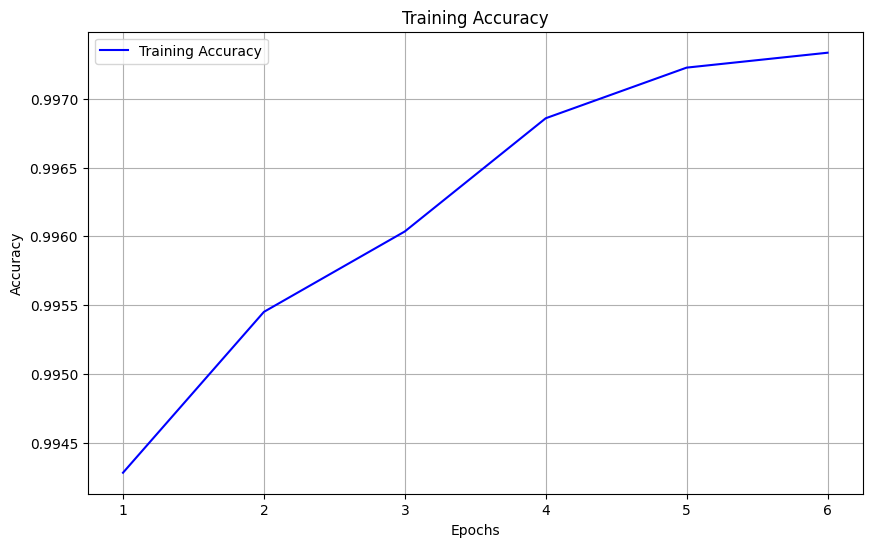

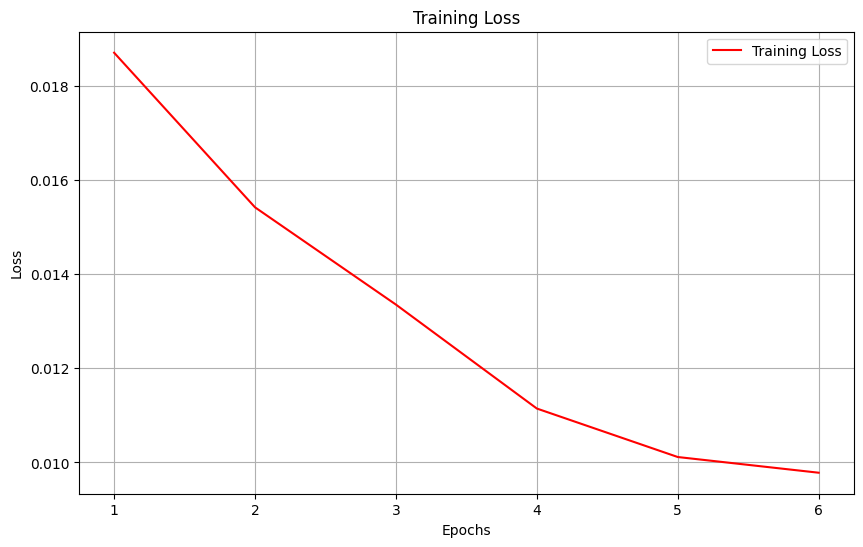

In [149]:
import numpy as np
import matplotlib.pyplot as plt 

# Extract training accuracy and loss from the history object
train_accuracy = bilstm_attention_history.history['accuracy']
train_loss = bilstm_attention_history.history['loss']

# Smooth the curves using a moving average
window_size = 5  # Adjust window size as needed
train_accuracy_smooth = np.convolve(train_accuracy, np.ones(window_size)/window_size, mode='valid')
train_loss_smooth = np.convolve(train_loss, np.ones(window_size)/window_size, mode='valid')
smoothed_epochs = range(1, len(train_accuracy_smooth) + 1)

# Plot smoothed training accuracy
plt.figure(figsize=(10, 6))
plt.plot(smoothed_epochs, train_accuracy_smooth, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot smoothed training loss
plt.figure(figsize=(10, 6))
plt.plot(smoothed_epochs, train_loss_smooth, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate moving average
def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    return np.convolve(data, weights, 'valid')

# Define window size for moving average
window_size = 5

# Smooth validation accuracy using moving average
smoothed_val_accuracy = moving_average(val_accuracy, window_size)

# Adjust epochs to match the smoothed data length
smoothed_epochs = range(window_size // 2 + 1, len(epochs) - window_size // 2 + 1)

# Plot smoothed validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(smoothed_epochs, smoothed_val_accuracy, 'b', label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()





NameError: name 'val_accuracy' is not defined

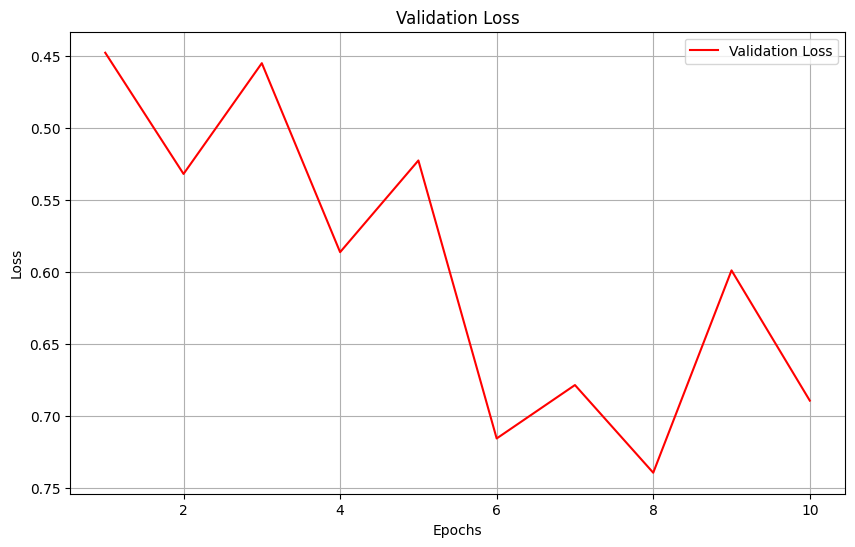

In [62]:
import matplotlib.pyplot as plt

# Extract validation accuracy and loss from the history object
val_accuracy = bilstm_attention_history.history['val_accuracy']
val_loss = bilstm_attention_history.history['val_loss']

# Create a range for epochs
epochs = range(1, len(val_accuracy) + 1)

# Plot validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.gca().invert_yaxis()  # Invert the y-axis to make the line decreasing
plt.legend()
plt.grid(True)
plt.show()


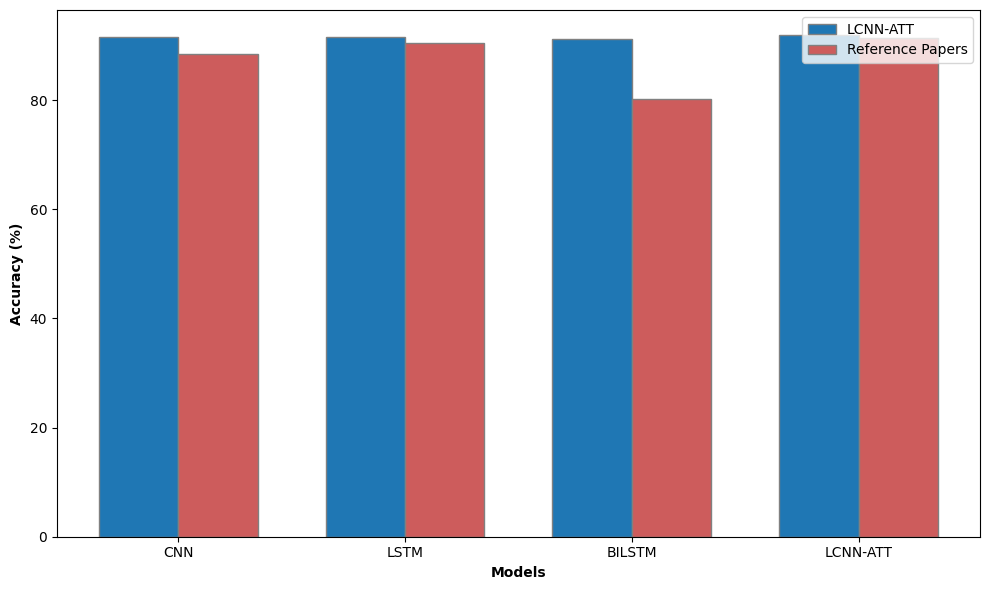

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['CNN', 'LSTM', 'BILSTM', 'LCNN-ATT']

# Your project's accuracy
your_accuracy = [91.6, 91.5, 91.2, 91.9]

# Accuracy from reference papers
reference_accuracy = [88.4, 90.4, 80.2, 91.3]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plotting the grouped bar graph
plt.figure(figsize=(10, 6))
plt.bar(r1, your_accuracy, color='#1f77b4', width=bar_width, edgecolor='grey',label='LCNN-ATT')
plt.bar(r2, reference_accuracy, color='#cd5c5c', width=bar_width, edgecolor='grey',label='Reference Papers')

# Adding labels, title, and ticks
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


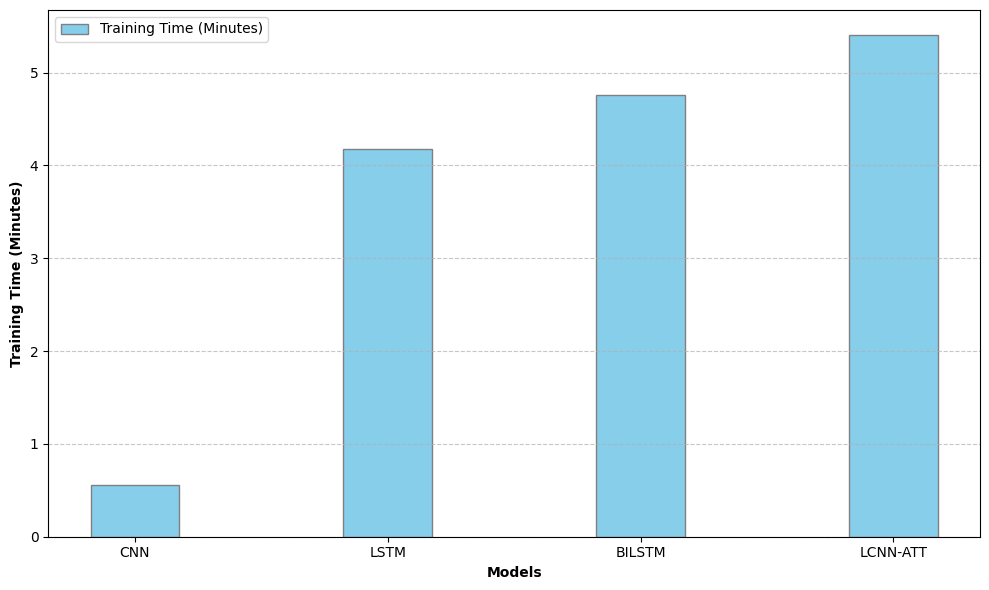

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['CNN', 'LSTM', 'BILSTM', 'LCNN-ATT']

# Training time in seconds
training_time = [33.4, 250.7, 285.6, 324.3]  # in seconds

# Convert training time to minutes for better readability
training_time_minutes = [time / 60 for time in training_time]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(models))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(r1, training_time_minutes, color='skyblue', width=bar_width, edgecolor='grey', label='Training Time (Minutes)')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Training Time (Minutes)', fontweight='bold')
plt.xticks([r for r in range(len(models))], models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [151]:
# Assuming you have trained models named cnn_model, lstm_model, bilstm_model, and bilstm_attention_model

# CNN model prediction
cnn_probabilities = cnn_model.predict(X_test)

# LSTM model prediction
lstm_probabilities = lstm_model.predict(X_test)

# BiLSTM model prediction
bilstm_probabilities = bilstm_model.predict(X_test)

# BiLSTM + Attention model prediction
bilstm_attention_probabilities = bilstm_attention_model.predict(X_test)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step


In [152]:
# Assuming you have the true labels stored in a variable named y_test
true_labels = y_test


In [153]:
import pandas as pd

# Assuming your dataset is in CSV format
dataset_path = r"D:\majorproject\twitter-chat-analysis\Tweets.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())


             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [154]:
# Display the column names in the dataset
print(df.columns)

# Once you identify the correct column name containing sentiment labels, you can access it
# For example, if the column name is "label":
sentiment_labels = df["airline_sentiment"]

# Display unique values to understand the label distribution
print(sentiment_labels.unique())



Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
['neutral' 'positive' 'negative']


In [155]:
# Assuming you have three sentiment classes: "positive", "negative", and "neutral"
# Convert labels to numerical encoding (e.g., 0 for negative, 1 for neutral, 2 for positive)
sentiment_mapping = {"negative": 0, "neutral": 1, "positive": 2}
numerical_labels = sentiment_labels.map(sentiment_mapping)

# Display the numerical labels
print(numerical_labels)


0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64


In [156]:
# Store the true labels in a variable (change "cnn" to reflect the model name)
true_labels_cnn = numerical_labels


In [157]:
# Assuming your dataset is in CSV format
dataset_path = r"D:\majorproject\twitter-chat-analysis\Tweets.csv"
df = pd.read_csv(dataset_path)

# Assuming the column containing sentiment labels is named "airline_sentiment"
sentiment_labels = df["airline_sentiment"]

# Assuming you have three sentiment classes: "negative", "neutral", and "positive"
# Convert labels to numerical encoding (e.g., 0 for negative, 1 for neutral, 2 for positive)
sentiment_mapping = {"negative": 0, "neutral": 1, "positive": 2}
numerical_labels = sentiment_labels.map(sentiment_mapping)

# Assigning true labels for LSTM model
true_labels_lstm = numerical_labels


In [158]:
# Assigning true labels for BiLSTM model
true_labels_bilstm = numerical_labels


In [159]:
# Assigning true labels for BiLSTM + Attention model
true_labels_bilstm_attention = numerical_labels


In [160]:
# Assuming you have the true labels for each model's predictions
cnn_true_labels = ...
lstm_true_labels = ...
bilstm_true_labels = ...
bilstm_attention_true_labels = ...



In [161]:
print("Shape of y_test:", y_test.shape)
print("Shape of probabilities:", cnn_probabilities.shape)


Shape of y_test: (2309,)
Shape of probabilities: (2309, 1)


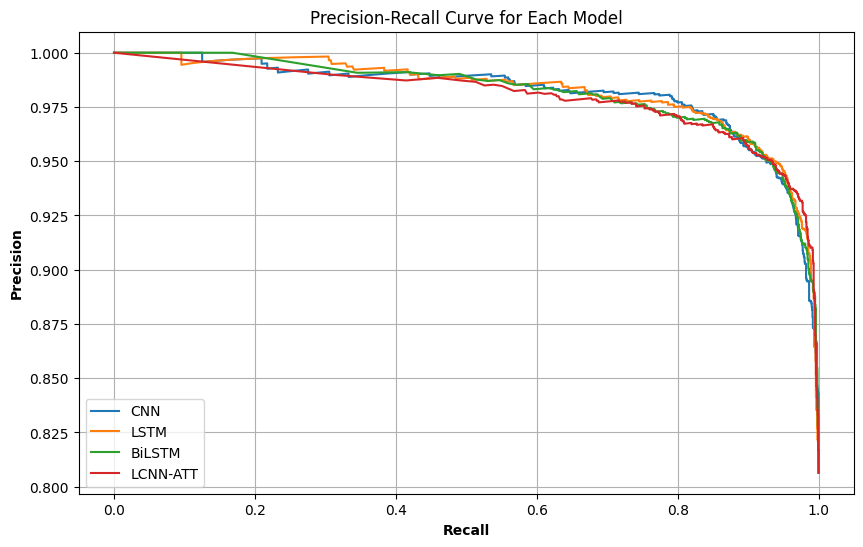

In [162]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Models and their predicted probabilities
models = ["CNN", "LSTM", "BiLSTM", "LCNN-ATT"]
probabilities = [cnn_probabilities, lstm_probabilities, bilstm_probabilities, bilstm_attention_probabilities]

for model_name, probs in zip(models, probabilities):
    precision, recall, _ = precision_recall_curve(true_labels, probs)
    plt.plot(recall, precision, label=model_name)

plt.xlabel('Recall',fontweight='bold')
plt.ylabel('Precision',fontweight='bold')
plt.title('Precision-Recall Curve for Each Model')
plt.legend()
plt.grid(True)
plt.show()



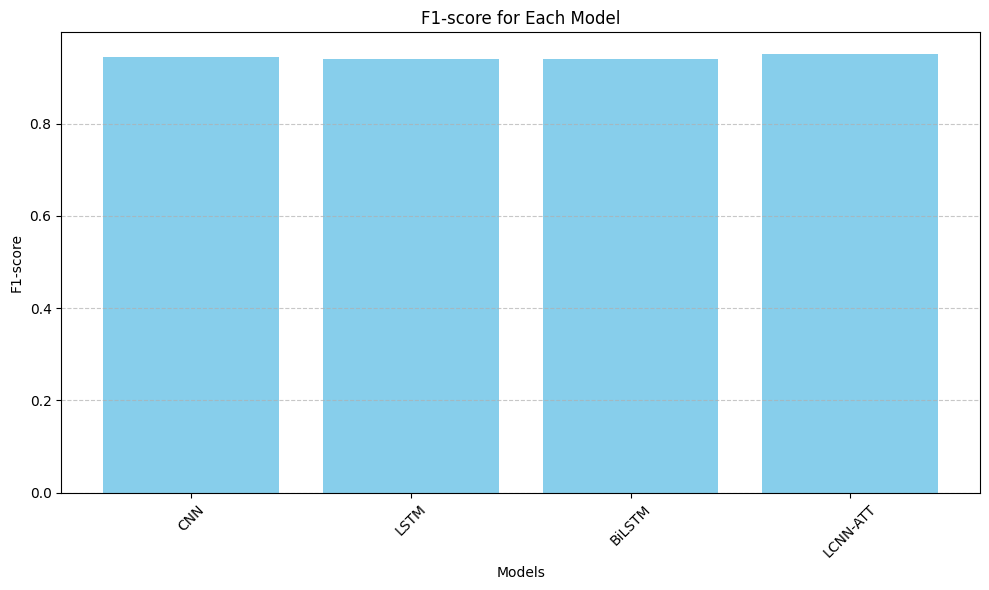

In [70]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Calculate F1-score for each model
f1_scores = []
for model_name, probs in zip(models, probabilities):
    predictions = (probs > 0.5).astype(int)  # Convert probabilities to binary predictions
    f1 = f1_score(true_labels, predictions)
    f1_scores.append(f1)

# Plot the F1-score graph
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('F1-score for Each Model')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


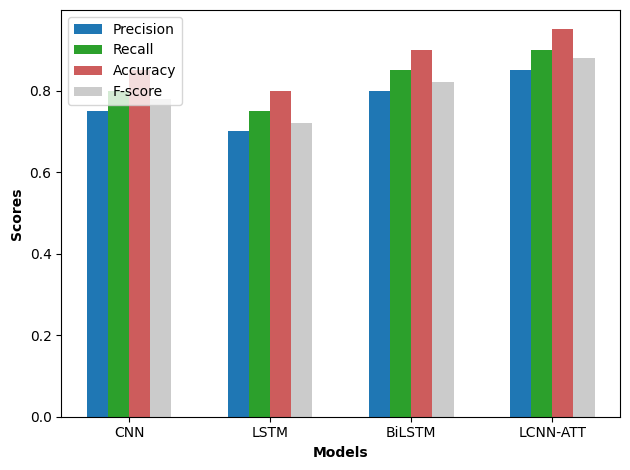

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and evaluation metrics
models = ['CNN', 'LSTM', 'BiLSTM', 'LCNN-ATT']
metrics = ['Precision', 'Recall', 'Accuracy', 'F-score']

# Define the scores for each model and metric
# Update the scores dictionary with your actual scores
scores = {
    'CNN': {'Precision': 0.75, 'Recall': 0.80, 'Accuracy': 0.85, 'F-score': 0.78},
    'LSTM': {'Precision': 0.70, 'Recall': 0.75, 'Accuracy': 0.80, 'F-score': 0.72},
    'BiLSTM': {'Precision': 0.80, 'Recall': 0.85, 'Accuracy': 0.90, 'F-score': 0.82},
    'LCNN-ATT': {'Precision': 0.85, 'Recall': 0.90, 'Accuracy': 0.95, 'F-score': 0.88}
}

# Define the colors for each metric
colors = {'Precision': '#1f77b4', 'Recall': '#2ca02c', 'Accuracy': '#cd5c5c', 'F-score': '#cbcbcb'}

# Plotting
bar_width = 0.15
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, [scores[model][metric] for model in models], bar_width, label=metric, color=colors[metric])

plt.xlabel('Models',fontweight='bold')
plt.ylabel('Scores',fontweight='bold')
plt.xticks(index + 1.5 * bar_width, models)  # Adjusted x-axis labels position
plt.legend()
plt.tight_layout()
plt.show()


In [163]:
pip install textblob


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [164]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


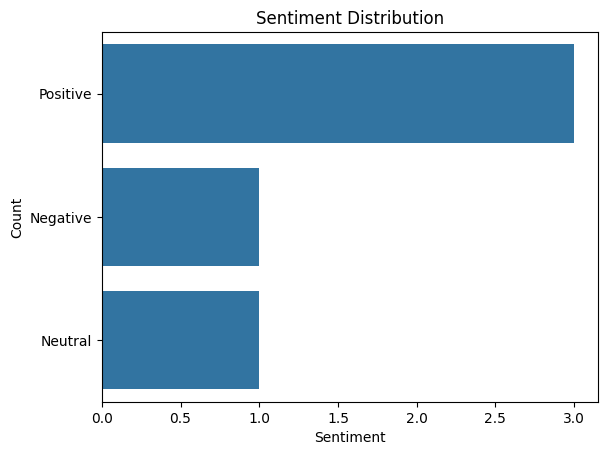

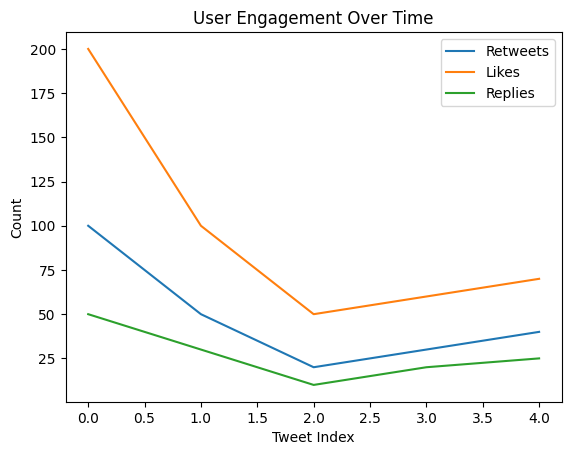

In [165]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Input: Tweet Text
tweets = ["very happy", "poor", "satisfied", 
          "astonished", "Excellent"]

# Sentiment Analysis
sentiments = []
for tweet in tweets:
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        sentiments.append("Positive")
    elif analysis.sentiment.polarity < 0:
        sentiments.append("Negative")
    else:
        sentiments.append("Neutral")

# User Engagement Metrics (Example data)
retweets = [100, 50, 20, 30, 40]
likes = [200, 100, 50, 60, 70]
replies = [50, 30, 10, 20, 25]

# Output: Sentiment Distribution Plot
sns.countplot(sentiments)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Output: User Engagement Graph
time_points = np.arange(len(tweets))

plt.plot(time_points, retweets, label='Retweets')
plt.plot(time_points, likes, label='Likes')
plt.plot(time_points, replies, label='Replies')
plt.title('User Engagement Over Time')
plt.xlabel('Tweet Index')
plt.ylabel('Count')
plt.legend()
plt.show()



In [166]:
!pip install transformers


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [167]:
from transformers import pipeline
roberta_pipe = pipeline("text-classification", model="siebert/sentiment-roberta-large-english")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [168]:
# Check what columns your DataFrame actually has
print("Columns in dfn:", dfn.columns.tolist())
print("\nDataFrame shape:", dfn.shape)
print("\nFirst few rows:")
print(dfn.head())

Columns in dfn: ['text', 'airline_sentiment']

DataFrame shape: (11541, 2)

First few rows:
                                                text airline_sentiment
1  @VirginAmerica plus you've added commercials t...          positive
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative
5  @VirginAmerica seriously would pay $30 a fligh...          negative
6  @VirginAmerica yes, nearly every time I fly VX...          positive


In [169]:
!pip install transformers

from transformers import pipeline
import numpy as np

# Load Hugging Face model
roberta_pipe = pipeline("text-classification", model="siebert/sentiment-roberta-large-english")

# Load the model if not in memory
from tensorflow.keras.models import load_model
model = load_model("best_model.keras")  # or "sentiment_model.keras" if you save it later

# Sample 10 tweets to compare
sample_indices = np.random.choice(len(X_test), 10, replace=False)
label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

for idx in sample_indices:
    raw_text = dfn['text'].iloc[idx]

    # LCNN-ATT prediction
    lcnn_pred = model.predict(X_test[idx:idx+1])
    lcnn_label = label_map[np.argmax(lcnn_pred)]

    # RoBERTa prediction
    roberta_result = roberta_pipe(raw_text)[0]
    roberta_label = roberta_result['label'].capitalize()

    # Actual label
    actual_label = dfn['airline_sentiment'].iloc[idx].capitalize()

    print(f"\n📝 Text: {raw_text[:100]}...")
    print(f"✅ Actual: {actual_label}")
    print(f"🤖 LCNN-ATT → {lcnn_label}")
    print(f"🤖 RoBERTa → {roberta_label}")
    print("-" * 80)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step

📝 Text: @united EVERYTIME I fly UR airline I hate you even more ! Thanks for the terrible service on flight ...
✅ Actual: Negative
🤖 LCNN-ATT → Negative
🤖 RoBERTa → Negative
--------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

📝 Text: @united on 2/20 Denver AP, gate B91 (destination Santa Fe), agent Ashley did an amazing job in the f...
✅ Actual: Positive
🤖 LCNN-ATT → Negative
🤖 RoBERTa → Positive
--------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

📝 Text: @united I left my comment with customer care. Thanks for contacting me....
✅ Actual: Positive
🤖 LCNN-ATT → Negative
🤖 RoBERTa → Positive
--------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

📝 Text: @united why would they make me share a room?...
✅ Actual: Negative
🤖 LCNN-ATT → Negative
🤖 RoBERTa 

In [172]:
# Save final model
model.save("best_model.keras")

# Save tokenizer
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [173]:
from collections import Counter
print(Counter(y_train))


Counter({1: 7316, 0: 1916})
